In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# préparation des données

In [4]:
df=pd.read_csv("timeSeries_epsilon.csv", index_col='Unnamed: 0')
df

,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,270.0,300.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
epsilon_31,0.001381,0.002936,0.004601,0.006681,0.010590,0.016683,0.022709,0.028125,0.033974,0.040750,...,0.039911,0.039912,0.039912,0.039912,0.039912,0.036154,0.032024,0.025721,0.018334,0.011430
epsilon_33,0.001945,0.004156,0.006397,0.009004,0.011478,0.014675,0.020829,0.026554,0.032728,0.039960,...,0.037888,0.037888,0.037888,0.037887,0.037887,0.032482,0.026983,0.022052,0.017714,0.014127
epsilon_43,0.002191,0.004675,0.007056,0.009447,0.011824,0.014021,0.016233,0.018997,0.021656,0.024301,...,0.019458,0.019458,0.019458,0.019458,0.019458,0.013356,0.008043,0.004115,0.002831,0.001372
epsilon_44,0.001763,0.003763,0.005622,0.007351,0.008987,0.010551,0.012098,0.013961,0.016068,0.018660,...,0.014890,0.014891,0.014892,0.014892,0.014892,0.009960,0.006351,0.004446,0.002659,0.000822
epsilon_45,0.002042,0.004384,0.006683,0.009056,0.011470,0.013742,0.016055,0.018649,0.021334,0.024740,...,0.020268,0.020266,0.020265,0.020265,0.020265,0.014261,0.008865,0.004630,0.001712,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
epsilon_2342475,0.001128,0.002374,0.003603,0.004883,0.006219,0.007688,0.009240,0.010877,0.012730,0.014802,...,0.012697,0.012697,0.012697,0.012697,0.012697,0.009548,0.006790,0.004369,0.002162,0.000066
epsilon_2342476,0.001128,0.002374,0.003603,0.004884,0.006221,0.007691,0.009244,0.010882,0.012737,0.014811,...,0.012705,0.012705,0.012705,0.012705,0.012705,0.009553,0.006793,0.004371,0.002163,0.000065
epsilon_2342523,0.001062,0.002274,0.003484,0.004767,0.006122,0.007580,0.009125,0.010755,0.012478,0.014277,...,0.012163,0.012163,0.012163,0.012163,0.012163,0.009099,0.006337,0.004410,0.002597,0.000774
epsilon_2342524,0.001051,0.002250,0.003450,0.004725,0.006074,0.007530,0.009076,0.010706,0.012435,0.014238,...,0.012153,0.012153,0.012153,0.012153,0.012153,0.009116,0.006380,0.004360,0.002442,0.000533


In [6]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.8 MB/s 


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

nbclus=10
model = TimeSeriesKMeans(n_clusters=nbclus, metric="dtw", max_iter=10)
prediction = model.fit_predict(df)

print(prediction)

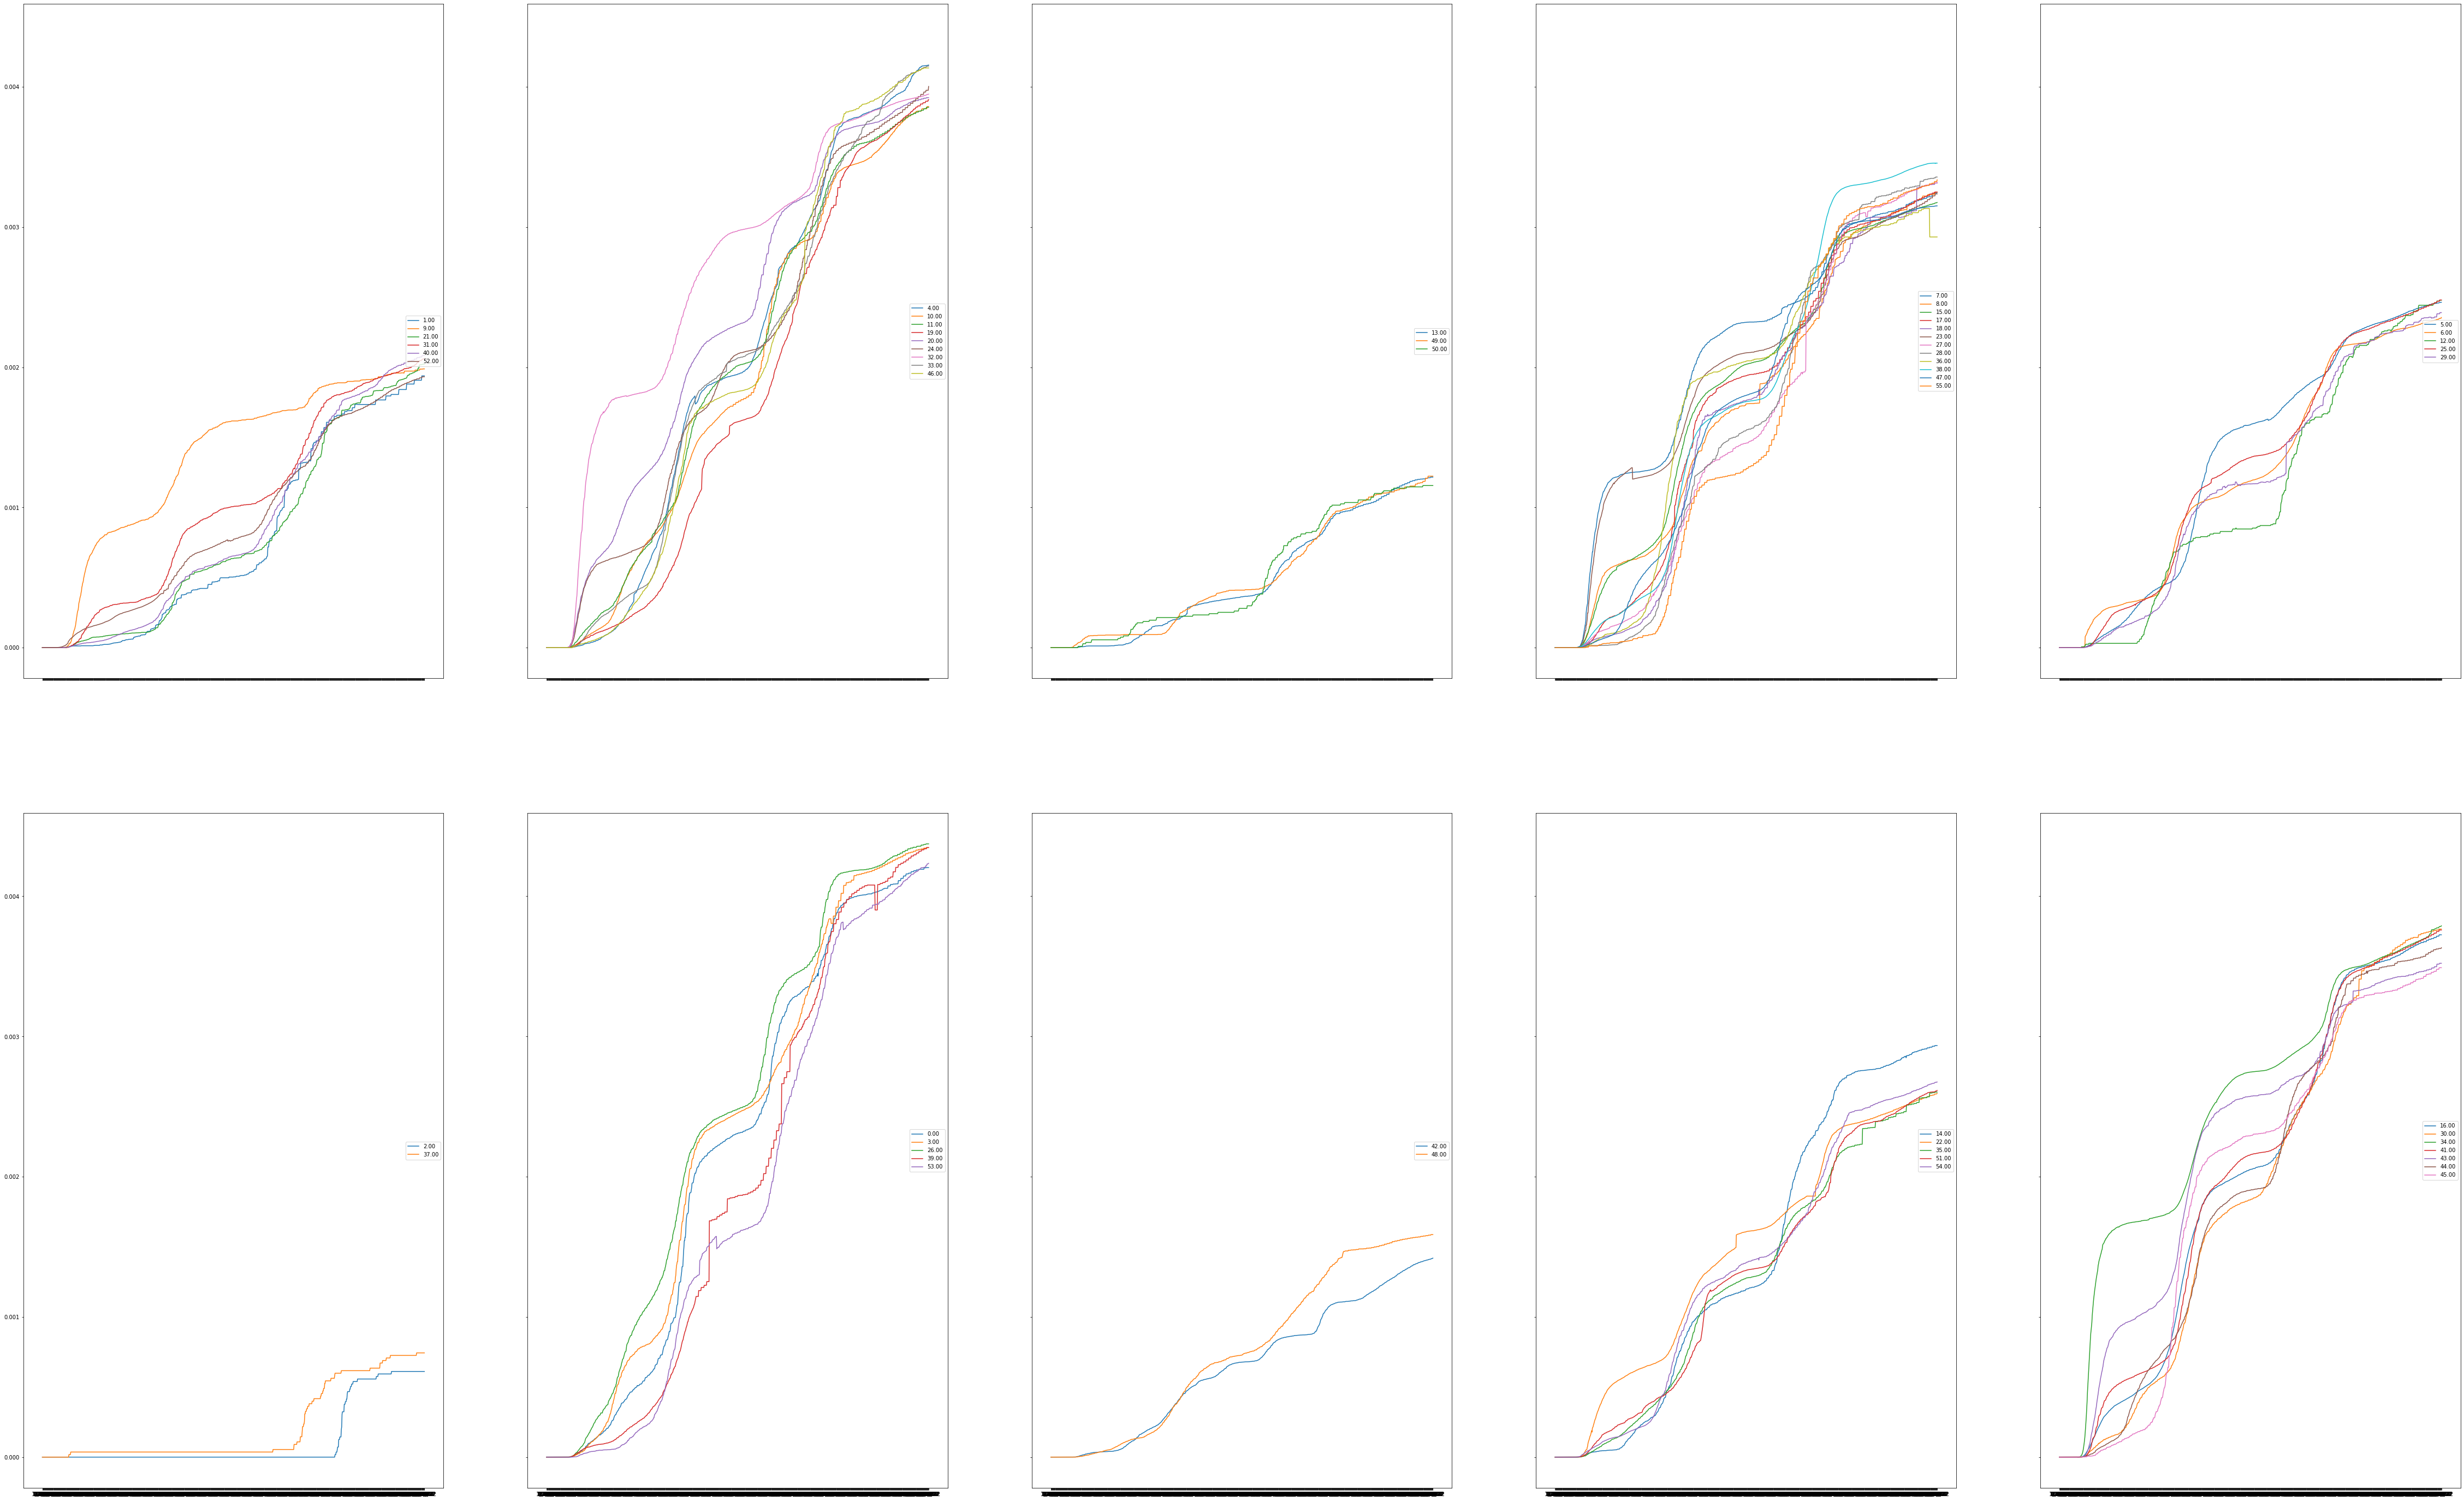

In [ ]:
fig,axes=plt.subplots(2,5, figsize=(80,50), sharex=True, sharey=True)

for k in range(len(prediction)):
  i=prediction[k]
  axes[i//5, i%5].plot(df.iloc[k], label='%.2f'%k)
  axes[i//5, i%5].legend(loc='right')

plt.show()

# Troisième version

### plutôt fiable

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(df,prediction)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
result=clf.predict(df)
result

array([1, 0, 2, 1, 1, 8, 4, 3, 3, 0, 1, 1, 4, 2, 8, 3, 1, 3, 3, 3, 1, 0,
       8, 3, 1, 8, 1, 3, 3, 4, 1, 0, 1, 1, 1, 8, 3, 2, 3, 1, 0, 1, 0, 3,
       1, 3, 1, 3, 0, 2, 2, 8, 0, 1, 8, 3])

In [ ]:
#taux de précision
sum(prediction==result)/len(prediction)

0.6607142857142857

# courbe modèle par classe

In [ ]:
from tslearn.barycenters import dtw_barycenter_averaging

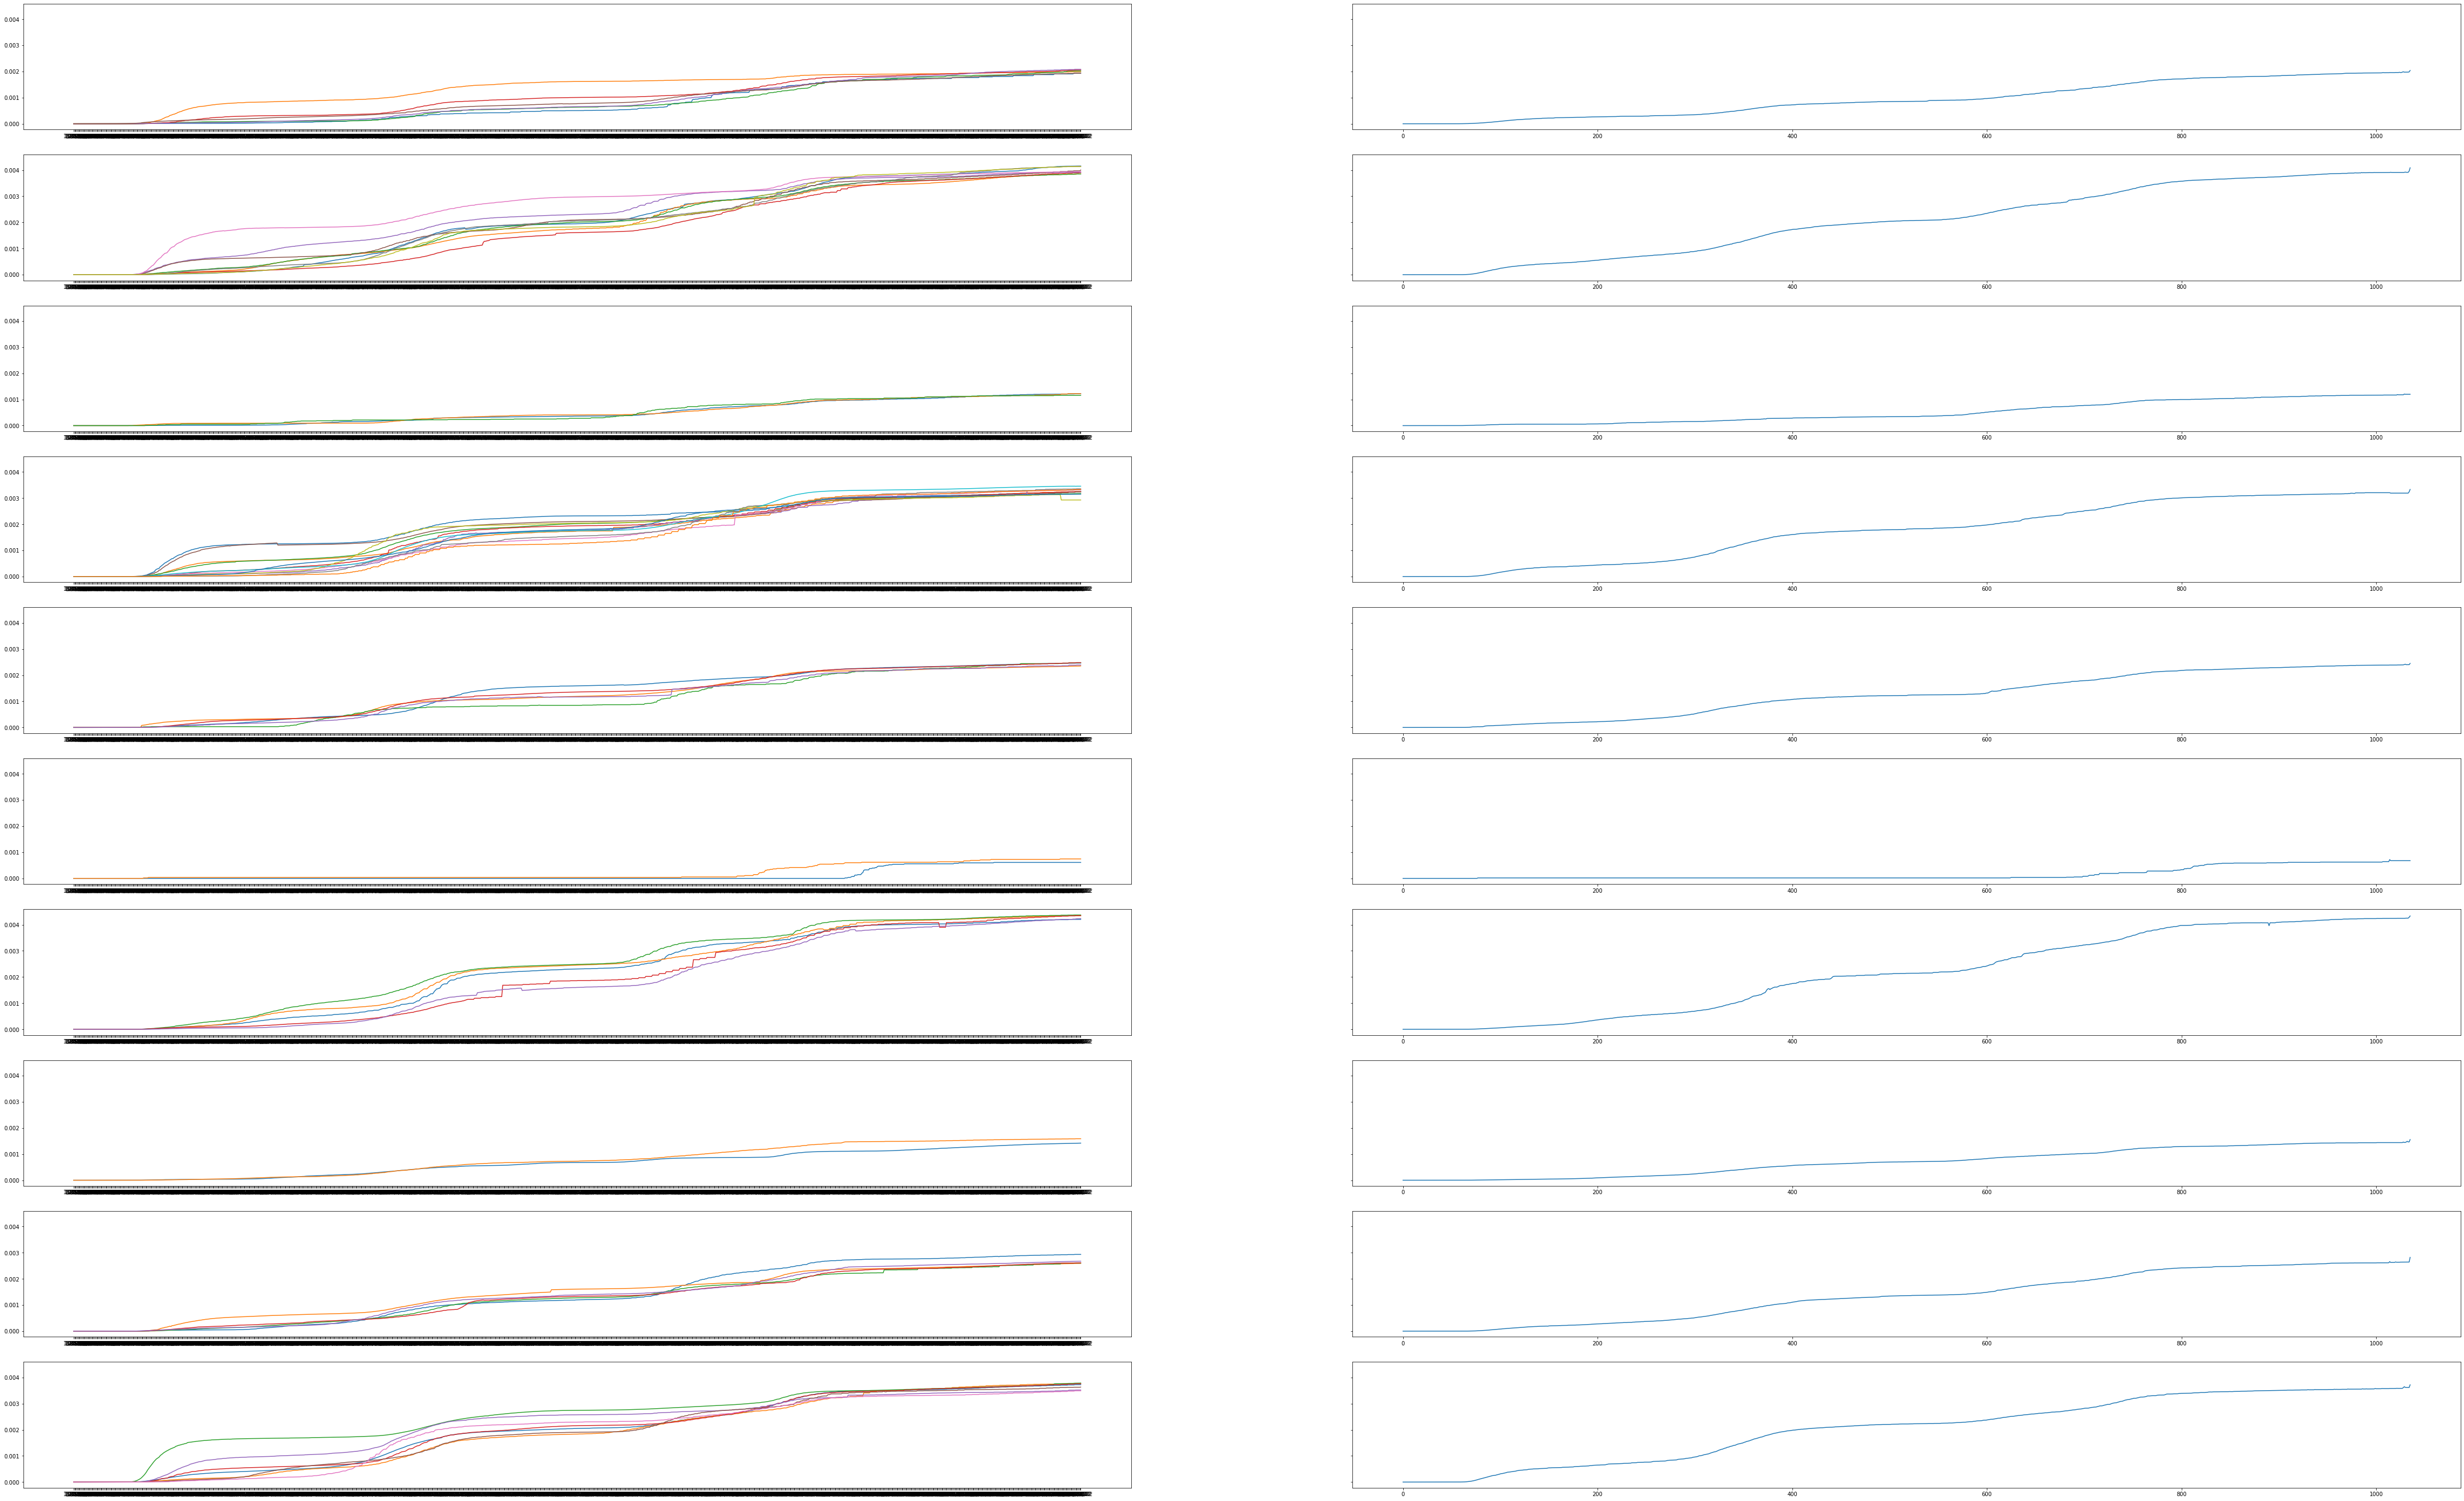

In [ ]:
fig,axes=plt.subplots(10,2, figsize=(80,50), sharey=True)
cref=[]#courbe de référence pour chaque classe
for k in np.unique(prediction):
  C=df.iloc[prediction == k]
  X=dtw_barycenter_averaging(C)
  cref.append(X)
  for j in range(C.shape[0]):
    axes[k,0].plot(C.iloc[j])
  axes[k,1].plot(X)

plt.show()

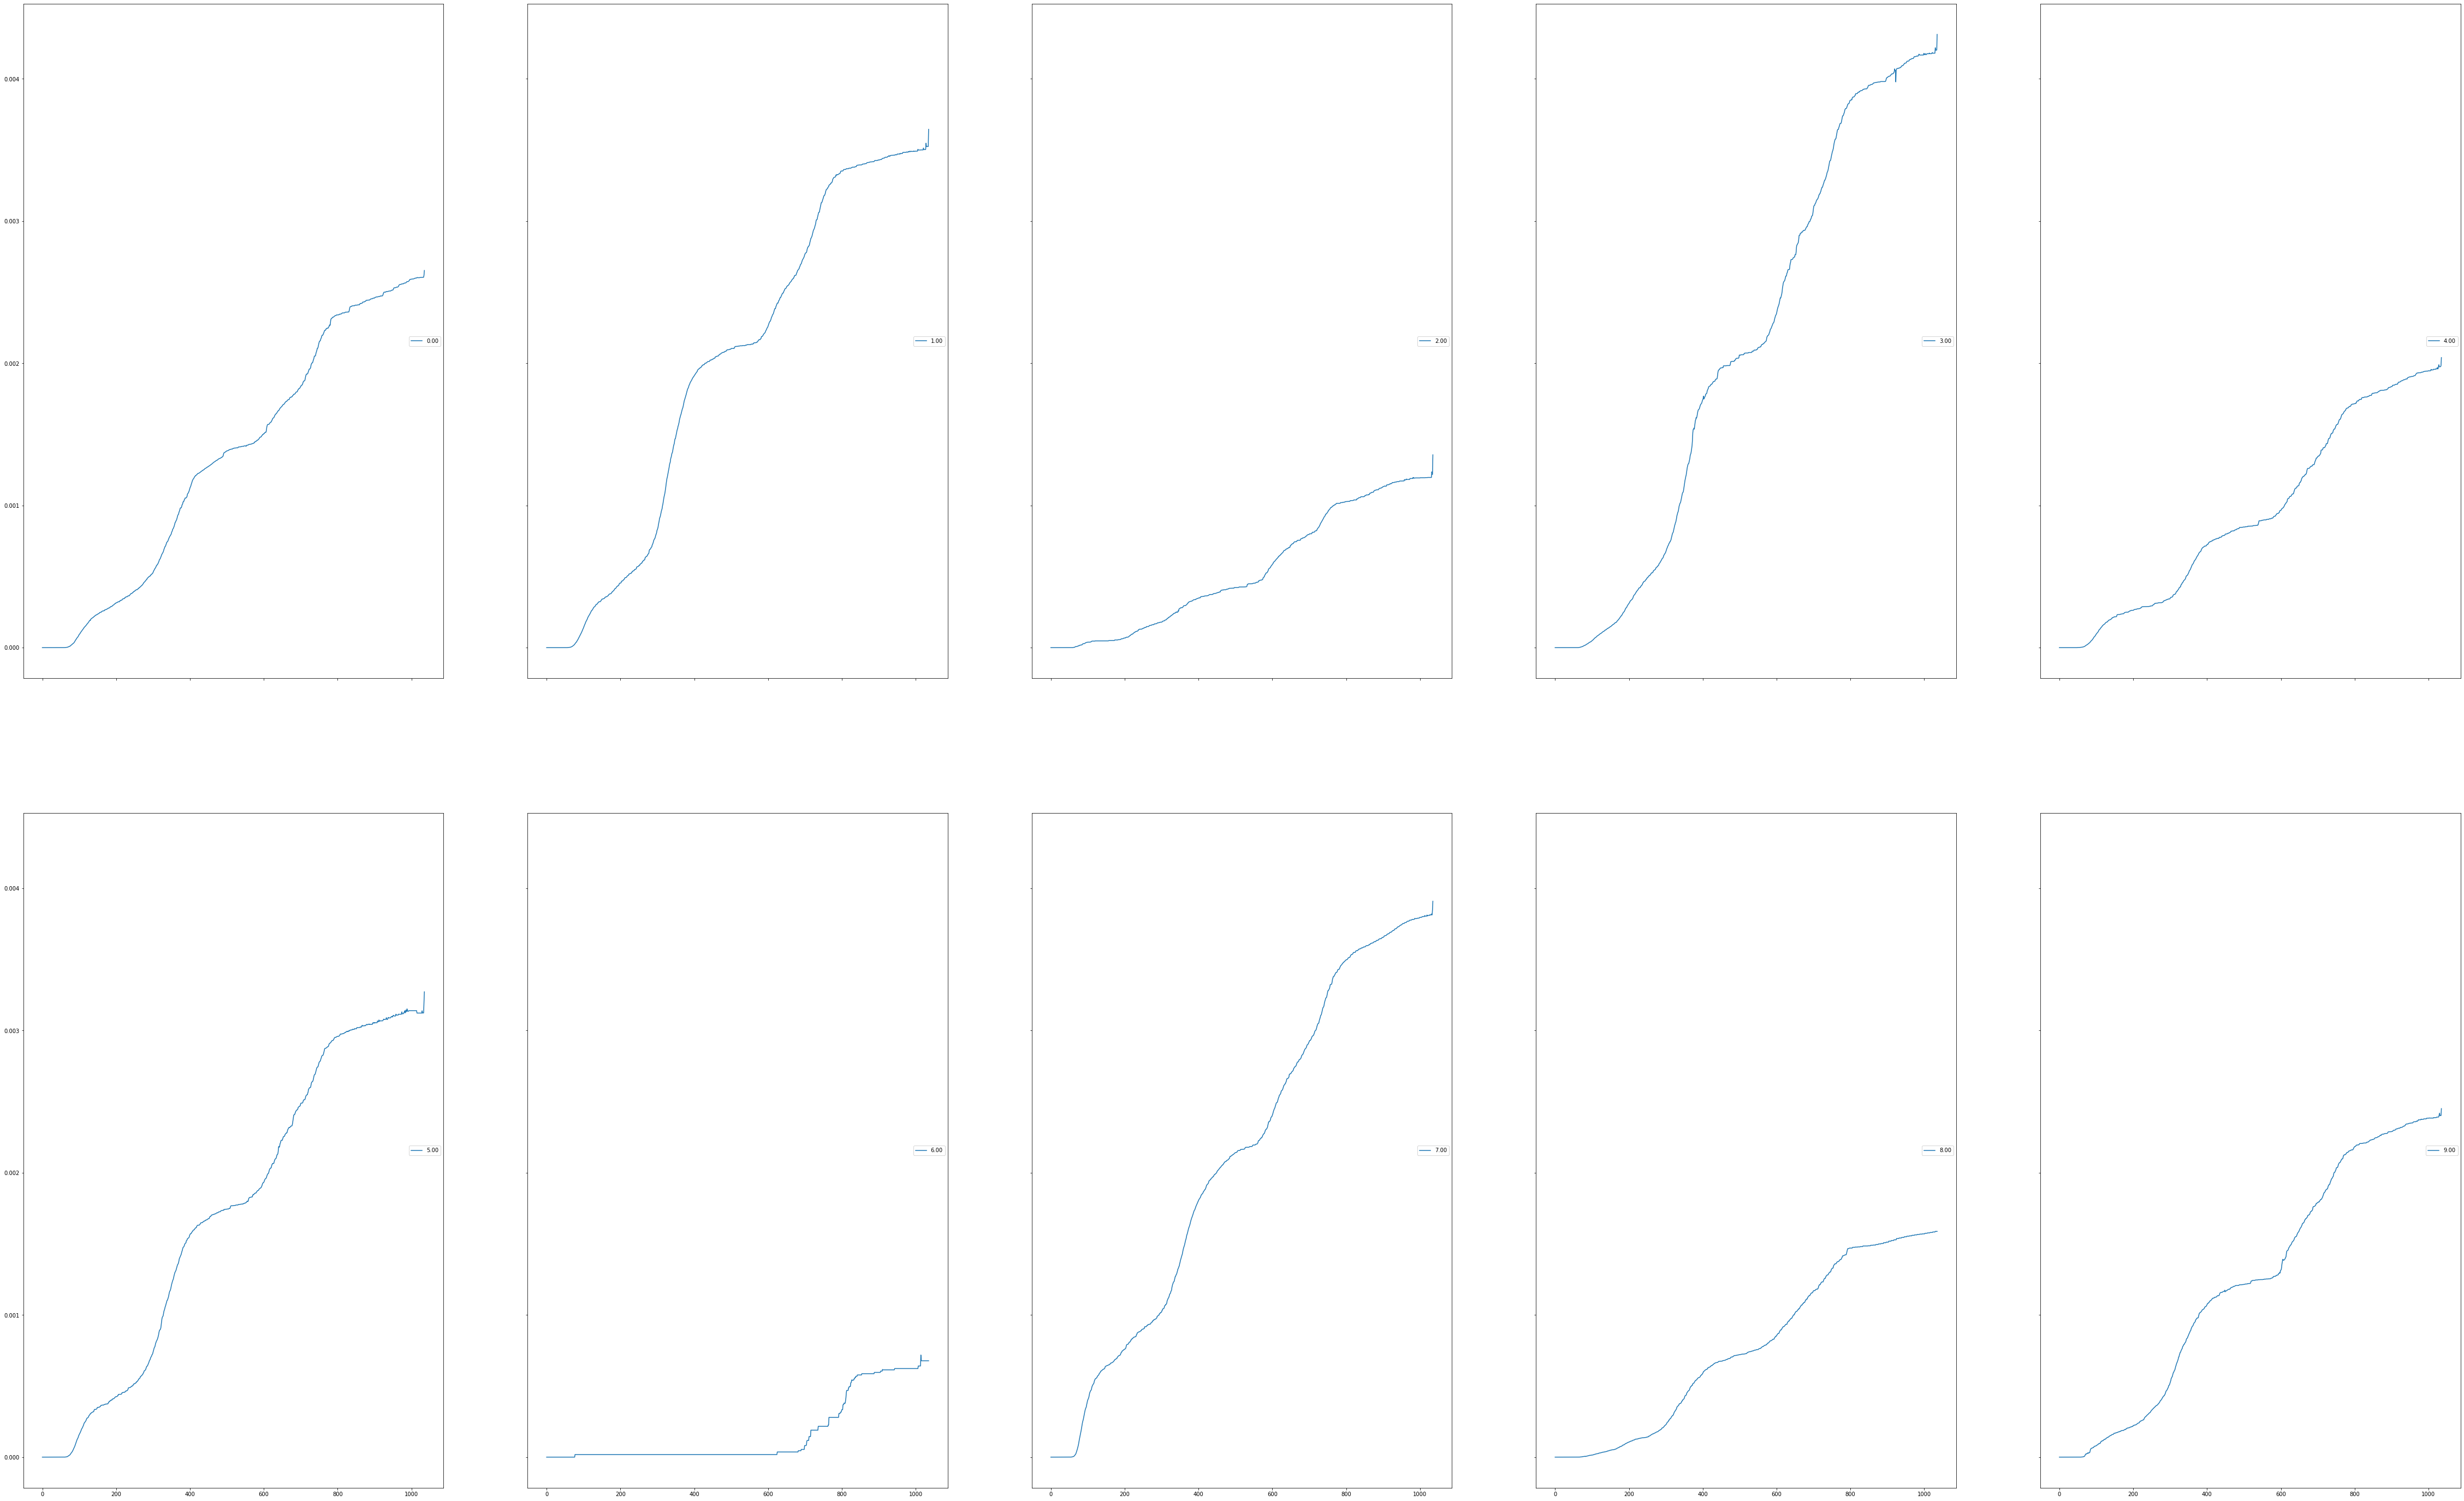

In [ ]:
fig,axes=plt.subplots(2,5, figsize=(80,50), sharex=True, sharey=True)

for k in range(len(cref)):
  axes[k//5, k%5].plot(cref[k], label='%.2f'%k)
  axes[k//5, k%5].legend(loc='right')

plt.show()